# Ejercicio 2 kmeans

Realizar estudios exploratorios de los datos usando análisis cluster y empleando el algoritmo de K-means o K-medias. Para ello habrá que:
- Procesar los datos. En esta etapa se seleccionarán las variables que sean relevantes, detectará los outliers y observaciones relevantes.

- Análisis cluster. Se determinará cuántos grupos significativos se pueden encontrar en los datos y se calcularán.

- Realiza una descripción semántica de los patrones encontrados, analizando la importancia de cada grupo y analizando la importancia de las variables en su definición, para ello hay que realizar una descripción estadística de los grupos encontrados.

**Segmentación de paises - Enunciado:**

https://www.kaggle.com/datasets/hellbuoy/pca-kmeans-hierarchical-clustering. En el dataset se encuentran datos relativos a factores socioeconómicos y de salud que determinan el desarrollo de un país. El objetivo es categorizar los países en base a esos factores socioeconómicos y de salud.

## Importación de las librerías necesarias

In [13]:
from google.colab import drive
from sklearn import preprocessing
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

## Procesamiento y elección de variables para el estudio

Importo el dataset

In [14]:
drive.mount("/content/drive")

df_countries = pd.read_csv('/content/drive/MyDrive/IABD/SAA/datasets/Tema 3/Country-data.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Muestro las primeras y últimas filas del dataset.

In [15]:
df_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


### Análisis estadístico.

Estudiamos los tipos de datos que tienen los atributos del datasets.

Solamente tenemos la variable categórica nominal (country), mientras que el resto tienen datos numéricos y nunguna de las características tiene un valor nulo.

In [16]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [17]:
df_countries.drop("country", axis=1).describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


#### Mapa de calor

El mapa de calor se va a realizar para ver si entre las variables puede existir una relación demasiado grande que los valores puedan ser lo mismos.

<Axes: >

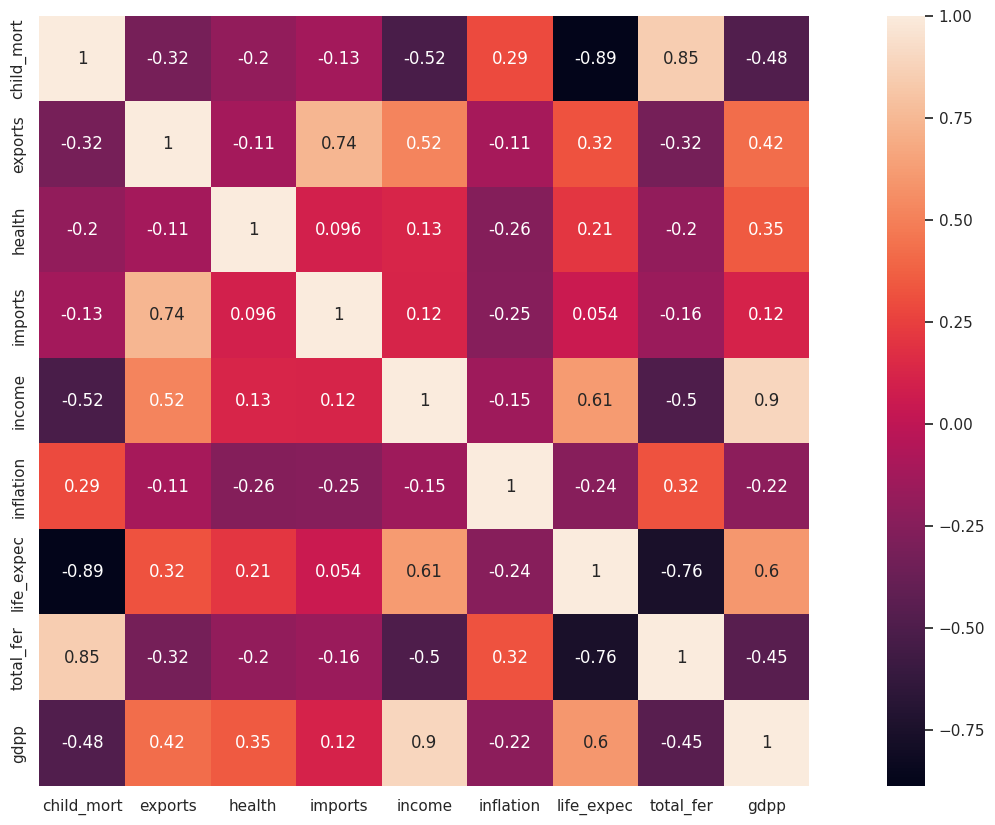

In [18]:
sns.set(rc={"figure.figsize": (20, 10)})
sns.heatmap(df_countries.drop("country", axis=1).corr(), square = True, annot = True)

### Argumentación de las variables elegidas

Para este ejercicio se van a elegir todas las características ya que todas tienen unos valores bastantes interesantes. Aunque si nos fiajmos en las características income y gdpp que tiene un valor de 0.9. Al tener una relación tan alta entre ambas puede ser que tengan información redundante y haya que elminar una.

## Escalamiento y detección de outliers

El escalamiento de las variables se debe realizar porque para el entrenamiento las variables deben estar escaladas y el modelo no le de más importancia a unos datos que a otros. Ademas se tiene que transformar la variables categóricas.

### Transformación variables categóricas

En este dataset no existe ninguna variable categórica, ya que, la variable "country" no interesa para el enternamiento porque nos interesa categorizar los países independientemente del nombre que tengan.

Vamos a buscar los outliers.

In [19]:
df_countries = df_countries.drop("country", axis=1)
N = df_countries.shape[0]

k = 4

SSE = []


for i in range(0, N):
  X_sin_i = np.delete(df_countries, i, axis=0)

  kmeans = KMeans(n_clusters=k, n_init=10, random_state=100).fit(X_sin_i)
  SSE.append(kmeans.inertia_)


sigma = np.std(SSE)
mu = np.mean(SSE)

umbral = 2

outliers = []
for i in range(0, N):
  if np.abs(SSE[i]-mu) > umbral*sigma:
    outliers.append(i)

df_sin_outliers = pd.DataFrame(np.delete(df_countries, outliers, axis=0), columns=df_countries.columns)
df_sin_outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...
156,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
157,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
158,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
159,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


Una vez que tenemos ya los outliers eliminados, vamos a escalar los datos.

In [20]:
scaler = preprocessing.MinMaxScaler()

df_sin_outliers = pd.DataFrame(scaler.fit_transform(df_sin_outliers), columns = df_countries.columns)
df_sin_outliers

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.426485,0.049482,0.352166,0.257765,0.014002,0.126144,0.475345,0.736593,0.005574
1,0.068160,0.139531,0.287508,0.279037,0.130380,0.080399,0.871795,0.078864,0.066801
2,0.120253,0.191559,0.138104,0.180149,0.171924,0.187691,0.875740,0.274448,0.073205
3,0.566699,0.311125,0.055242,0.246266,0.074009,0.245911,0.552268,0.790221,0.057107
4,0.037488,0.227079,0.254865,0.338255,0.258648,0.052213,0.881657,0.154574,0.207187
...,...,...,...,...,...,...,...,...,...
156,0.129503,0.232582,0.205901,0.302609,0.032745,0.063118,0.609467,0.370662,0.047413
157,0.070594,0.142032,0.184557,0.100809,0.222280,0.463081,0.854043,0.208202,0.229691
158,0.100779,0.359651,0.305712,0.460715,0.054287,0.150725,0.808679,0.126183,0.018678
159,0.261441,0.149536,0.201507,0.197397,0.054147,0.257000,0.698225,0.555205,0.018678


## Ejecución de análisis cluster con un valor de k concreto (número de grupos), por ejemplo 4, y determinar el número de réplicas (n_init) del algoritmo que conduce a que la repetición de dicho algoritmo genere la misma solución.

In [21]:
k = 4

previous_centers = None
stable_n_init = None

for n_init in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):
            stable_n_init = n_init
            break

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes es: {stable_n_init}")

El número mínimo de n_init que genera soluciones consistentes es: 2


## Determinar el valor de k (número de grupos)

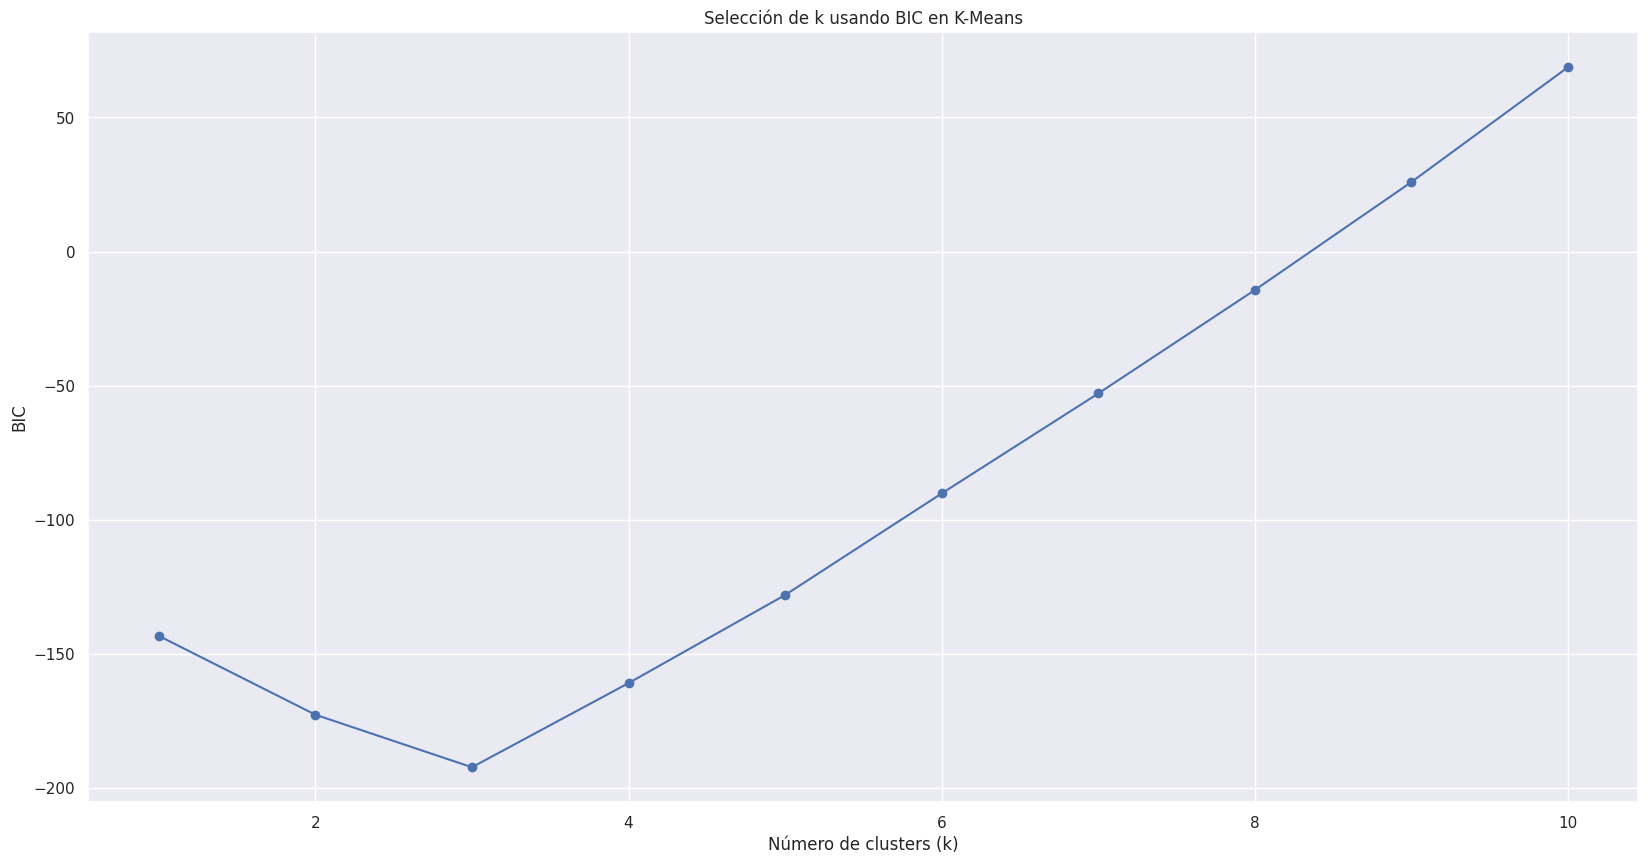

El número óptimo de clusters según BIC es: 3


In [22]:
def bic_kmeans(X, max_k=10):
    n, d = X.shape
    bics = []
    k_values = range(1, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmeans.fit(X)
        SSE = kmeans.inertia_

        # Número de parámetros
        p = k * (d + 1)

        # Calcular BIC
        bic = n * np.log(SSE / n) + p * np.log(n)
        bics.append(bic)

    return k_values, bics

# Calcular BIC para diferentes valores de k
k_values, bics = bic_kmeans(df_sin_outliers)

# Graficar el BIC
plt.plot(k_values, bics, marker='o', linestyle='-')
plt.xlabel("Número de clusters (k)")
plt.ylabel("BIC")
plt.title("Selección de k usando BIC en K-Means")
plt.show()

# Mejor k (mínimo BIC)
best_k = k_values[np.argmin(bics)]
print(f"El número óptimo de clusters según BIC es: {best_k}")


## Ejecución de análisis con los datos calculados (k y n_init)

El número mínimo de n_init que genera soluciones consistentes para k = 3 es: 2


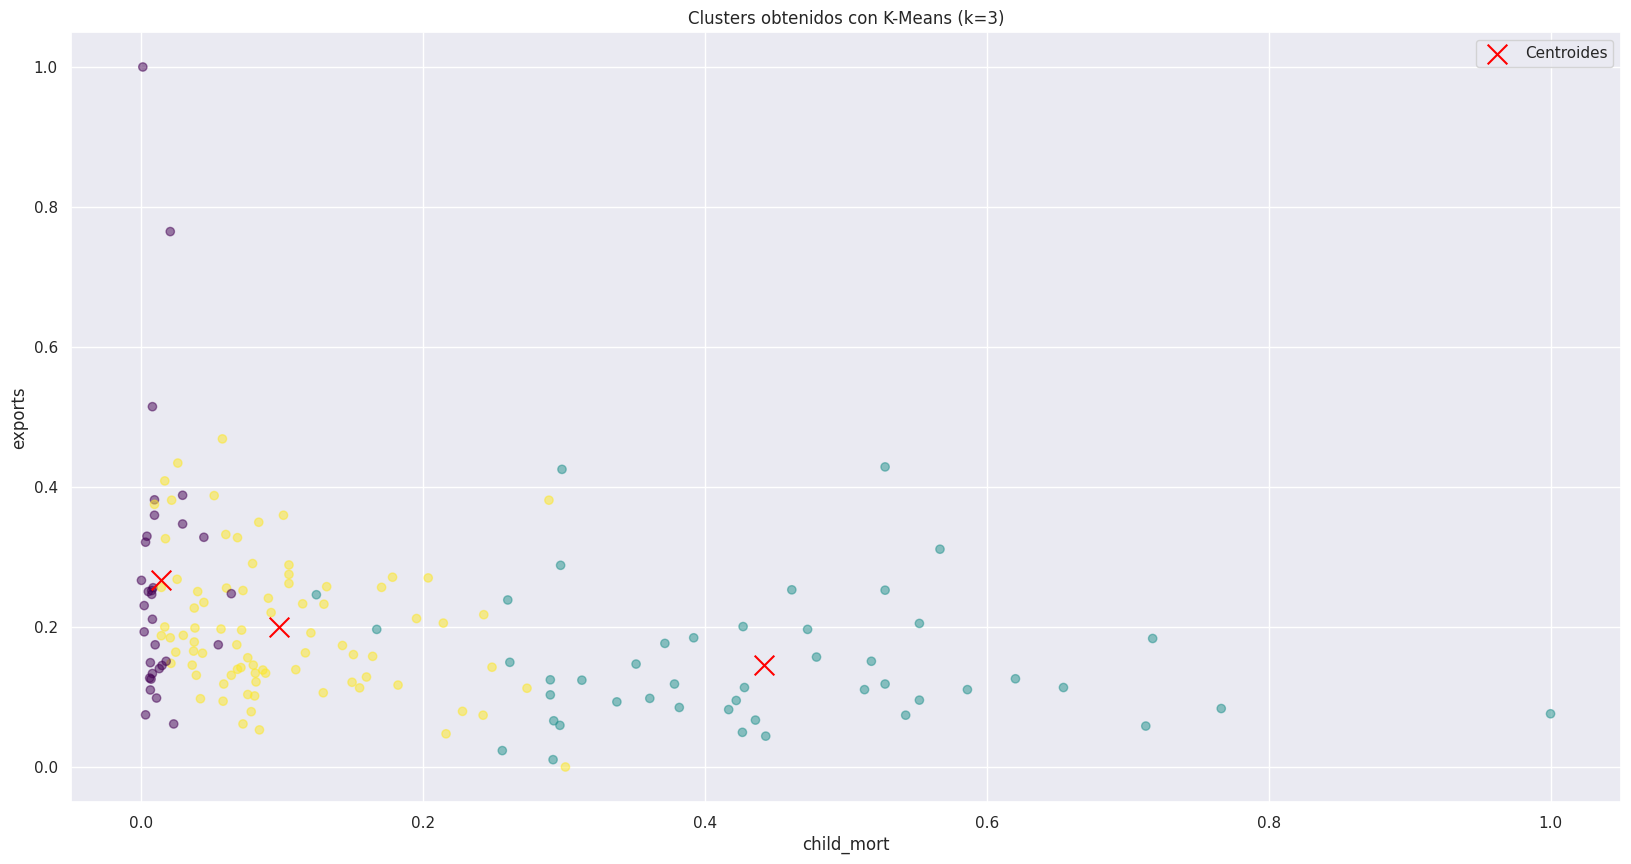

In [23]:
k = 3

previous_centers = None
stable_n_init = None

for n_init in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=n_init)
    kmeans.fit(df_sin_outliers)
    current_centers = np.sort(kmeans.cluster_centers_, axis=0)

    if previous_centers is not None:
        if np.allclose(previous_centers, current_centers, atol=1e-4):
            stable_n_init = n_init
            break

    previous_centers = current_centers

print(f"El número mínimo de n_init que genera soluciones consistentes para k = {k} es: {stable_n_init}")

kmeans = KMeans(n_clusters=k, n_init=stable_n_init, random_state=1)
kmeans.fit(df_sin_outliers)

labels = kmeans.labels_

centroids = kmeans.cluster_centers_

plt.scatter(df_sin_outliers.iloc[:, 0], df_sin_outliers.iloc[:, 1], c=labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label="Centroides")
plt.xlabel(df_sin_outliers.columns[0])
plt.ylabel(df_sin_outliers.columns[1])
plt.title(f"Clusters obtenidos con K-Means (k={k})")
plt.legend()
plt.show()


## Mostrar para el análisis anterior una tabla con los siguientes datos: número de grupo, cantidad de observaciones de ese grupo y el centroide que representa a ese grupo (valor de cada variable)

In [24]:
# Obtener etiquetas de los clusters
labels = kmeans.labels_

# Obtener los centroides
centroids = kmeans.cluster_centers_

data = []

k = 3

for i in range(k):
    cluster_data = df_sin_outliers[labels == i]

    count = len(cluster_data)

    centroid = centroids[i]

    data.append([i, count, *centroid])

df_cluster_info = pd.DataFrame(data, columns=['Número de grupo', 'Cantidad de observaciones', 'Centroide: child_mort', 'Centroide: exports', 'Centroide: health', 'Centroide: imports', 'Centroide: income', 'Centroide: inflation', 'Centroide: life_expec', 'Centroide: total_fer', 'Centroide: gdpp'])

df_cluster_info

,Número de grupo,Cantidad de observaciones,Centroide: child_mort,Centroide: exports,Centroide: health,Centroide: imports,Centroide: income,Centroide: inflation,Centroide: life_expec,Centroide: total_fer,Centroide: gdpp
0,0,32,0.013723,0.267335,0.439756,0.284894,0.534513,0.062968,0.941568,0.105333,0.627990
1,1,46,0.441503,0.145970,0.274230,0.248553,0.040674,0.150698,0.538333,0.621485,0.025358
2,2,83,0.097958,0.200130,0.272200,0.272898,0.154749,0.107382,0.796630,0.177340,0.101782


## Realizar una descripción semántica de los grupos

### Grupo 0
En este grupo parece ser de países desarrollados y de altos ingresos con una alta calidad de vida, economías fuertes y sistemas de salud avanzados. Tiene un total de 32 ocurrencias. Según las características:
- Baja mortalidad infantil (0.014), lo que indica buenos sistemas de salud y condiciones de vida.
- Altos niveles de exportaciones e importaciones (0.27 y 0.28 respectivamente), lo que sugiere economías abiertas y globalizadas.
- Alta inversión en salud (0.44), lo que contribuye a la alta esperanza de vida (0.94).
- Bajo índice de fertilidad (0.11), típico de países con alto desarrollo económico y educación.
- Alto ingreso y PIB per cápita (0.53 y 0.63), lo que reafirma que son economías avanzadas.
- Baja inflación (0.06), lo que indica estabilidad macroeconómica.

### Grupo 1
Representa países en desarrollo con bajos ingresos, alta mortalidad infantil y problemas en salud y estabilidad económica. Tiene un total de 46 ocurrencias.
- Alta mortalidad infantil (0.44), reflejando problemas en salud y condiciones de vida.
- Bajas exportaciones e importaciones (0.15 y 0.25), lo que indica economías menos integradas en el comercio global.
- Baja inversión en salud (0.27), lo que afecta la esperanza de vida (0.54).
- Alta tasa de fertilidad (0.62), común en países en vías de desarrollo.
- Bajo ingreso y PIB per cápita (0.04 y 0.025), reflejando pobreza y desigualdad económica.
- Alta inflación (0.15), lo que sugiere inestabilidad económica.

### Grupo 2
Representa países emergentes con economías en crecimiento, mejoras en salud y estabilidad económica en desarrollo. Tiene un total de 83 ocurrencias.
- Moderada mortalidad infantil (0.097), mejor que el grupo 1 pero peor que el grupo 0.
- Exportaciones e importaciones en nivel intermedio (0.20 y 0.27), lo que sugiere economías en crecimiento.
- Gasto en salud moderado (0.27) y esperanza de vida (0.80), lo que indica avances en bienestar.
- Tasa de fertilidad intermedia (0.18), lo que sugiere una transición demográfica.
- Ingreso y PIB per cápita moderados (0.15 y 0.10), reflejando economías en expansión.
- Inflación controlada (0.10), lo que indica cierta estabilidad económica.